In [1]:
using AA222
using JuMP
using Gurobi # must have Gurobi installed properly

# Example optimization problem

Minimize  
$(x_1+2)^2-x_2 \equiv f$  
subject to  
$x_1^2/4 + x_2 - 1 \leq 0 \equiv g_1$  
$2 + x_1 - 2x_2 \leq 0 \equiv g_2$  
(OCAE, Sec. 1.5)

In [2]:
f(x) = (x[1]+2)^2 - x[2]
g1(x) = x[1]^2/4 + x[2] - 1
g2(x) = x[1] - 2 * x[2];

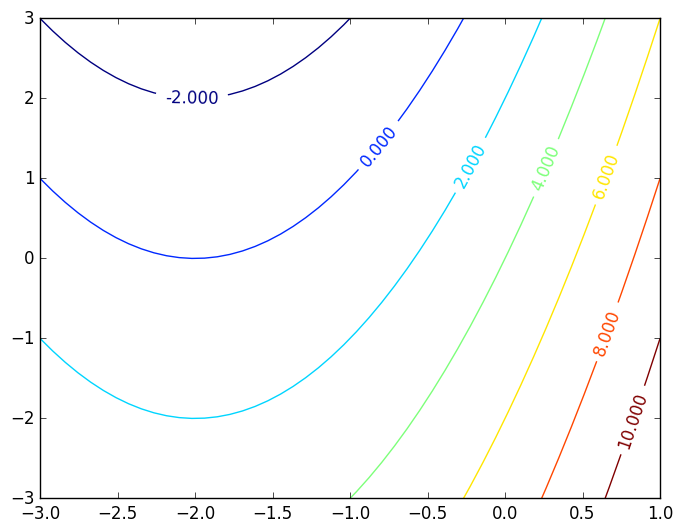

In [3]:
xdom(-3,1)
ydom(-3,3)
contour(f);

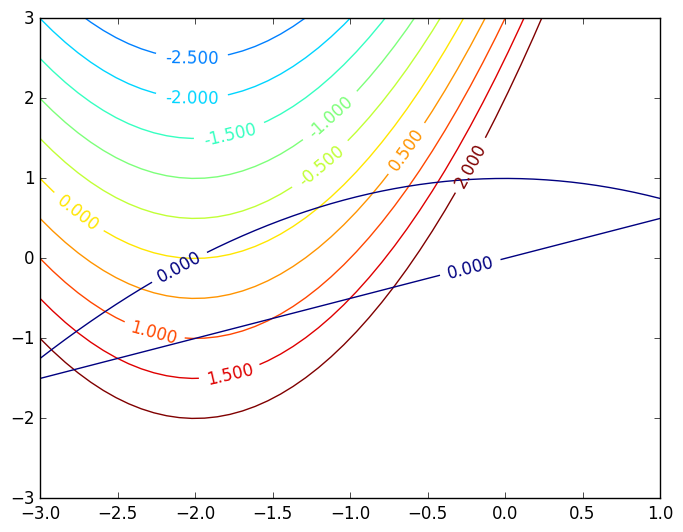

In [4]:
contour(f,-4:0.5:2)
contour(g1, 0)
contour(g2, 0);

In [5]:
m = Model()
@defVar(m, x1)
@defVar(m, x2)
@setObjective(m, Min, (x1+2)^2 - x2)
@addConstraint(m, x1^2/4 + x2 - 1 <= 0)
@addConstraint(m, 2 + x1 - 2* x2 <= 0)
print(m)

Min x1² + 4 x1 - x2 + 4
Subject to
 x1 - 2 x2 <= -2
 0.25 x1² + x2 - 1 <= 0
 x1 free
 x2 free


In [6]:
solve(m)
println("Objective value: ", getObjectiveValue(m))
println("x1 = ", getValue(x1))
println("x2 = ", getValue(x2))

Optimize a model with 1 rows, 2 columns and 2 nonzeros
Model has 1 quadratic objective term
Model has 1 quadratic constraint
Coefficient statistics:
  Matrix range    [1e+00, 2e+00]
  Objective range [1e+00, 4e+00]
  Bounds range    [0e+00, 0e+00]
  RHS range       [2e+00, 2e+00]
Presolve time: 0.00s
Presolved: 5 rows, 7 columns, 10 nonzeros
Presolved model has 2 second-order cone constraints
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 1
 AA' NZ     : 7.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 5.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0  -8.00000280e-01 -8.00000280e-01  1.60e+00 4.56e+00  3.28e+00     0s
   1  -3.56512693e+00 -3.16220711e+00  5.74e-02 7.91e-01  2.84e-01     0s
   2  -3.80198170e+00 -3.67490843e+00  5.74e-08 2.68e-01  8.26e-02     0s
   3  -4.09473293e+00 -4.45625620e+00  2.93e-08 5.00e-07  5.16e-02     0s


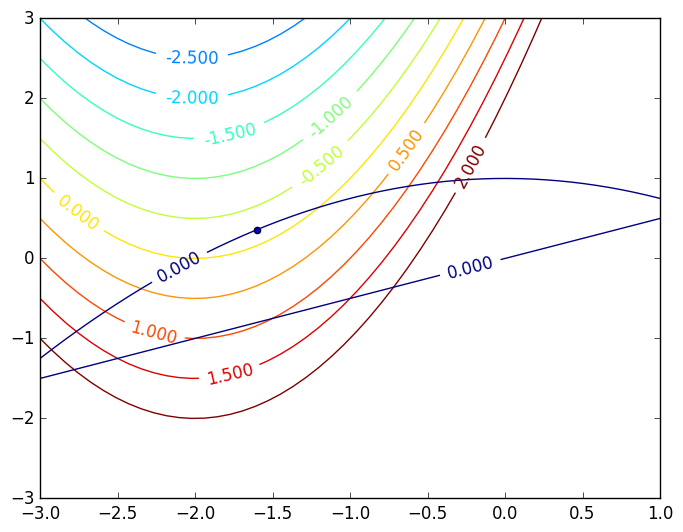

In [7]:
contour(f,-4:0.5:2)
contour(g1, 0)
contour(g2, 0)
scatter(getValue(x1),getValue(x2));

* Which constraint is active?
* What is the effect of adding contraints

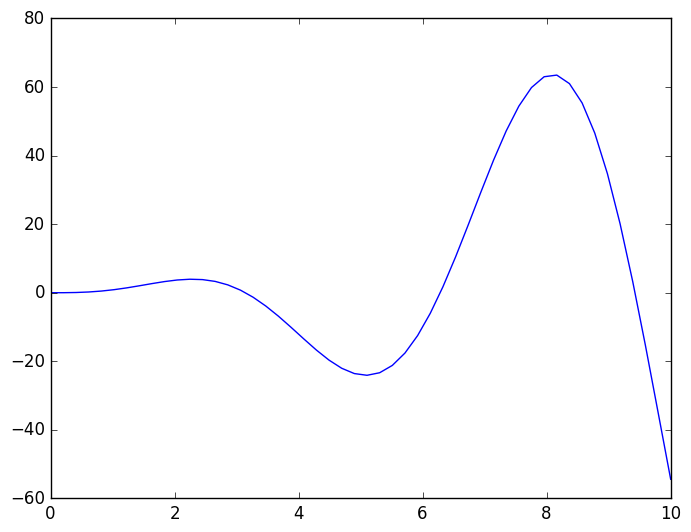

In [8]:
f(x) = x^2*sin(x)
xdom(0,10)
plot(f);

First order (linear) approximation at $x^0 = 3$  
$f(x) \approx f(x^0) + f'(x^0)(x - x^0)$

-0.19999955546894377
x1 = -1.6002397812799947
x2 = 0.3598081144488892


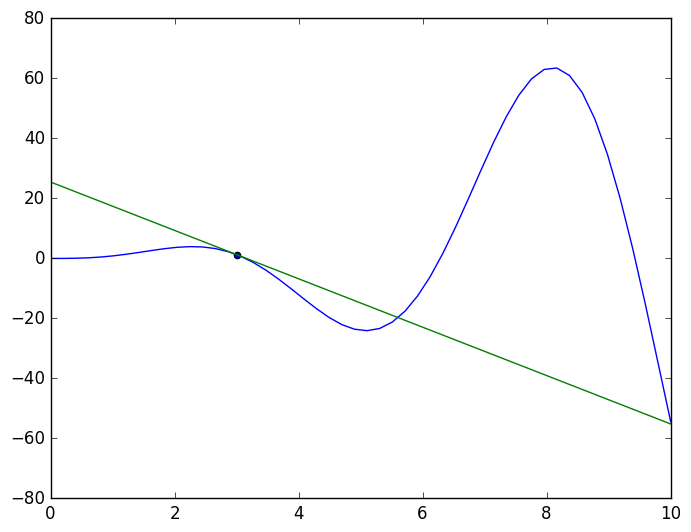

In [9]:
f1(x) = 2x*sin(x) + x^2*cos(x)
x0 = 3.
fApprox(x) = f(x0) + f1(x0)*(x-x0)
scatter(3, f(3))
plot(f)
plot(fApprox);

Second order (quadratic) approximation at $x^0 = 3$  
$f(x) \approx f(x^0) + f'(x^0)(x - x^0) + \frac12 f''(x^0)(x - x^0)^2$

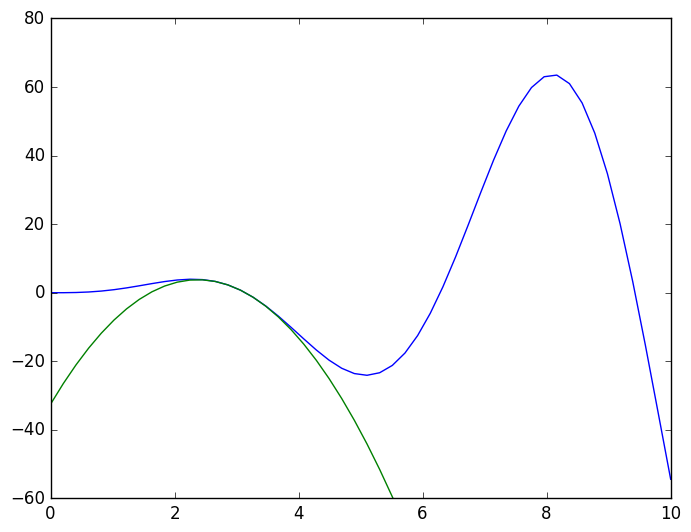

In [10]:
f2(x) = 4x*cos(x)-(x^2-2)*sin(x)
fApprox(x) = f(x0) + f1(x0)*(x-x0) + 0.5*f2(x0)*(x-x0)^2
ylim(-60, 80)
plot(f)
plot(fApprox);

Taylor series:  
$f(x) \approx f(x^0) + \frac{f'(x^0)}{1!}(x - x^0) + \frac{f''(x^0)}{2!}(x - x^0)^2 + \frac{f^{(3)}(x^0)}{3!}(x - x^0)^3 + \cdots$  
$f(x) \approx \sum_{i=0}^{\infty} \frac{f^{(i)}(x^0)}{i!}(x - x^0)^i$

# Higher dimensional approximation

Example function: $f(\vec x) = 2x_1 + x_2/x_1$

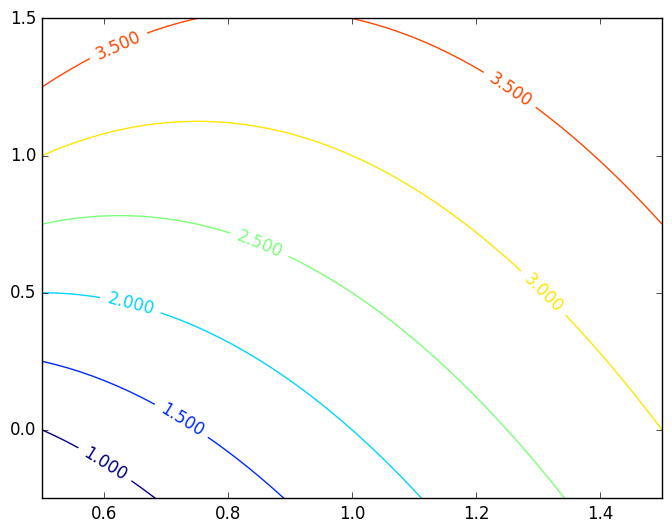

In [11]:
f(x) = 2x[1] + x[2]/x[1];
xdom(0.5,1.5)
ydom(-0.25,1.5)
contour(f, 1:0.5:4);

$$f(\vec x) = 2x_1 + x_2/x_1$$
$$\nabla f = \left[ \frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2} \right] = \left[ 2 - x_2/x_1^2, 1/x_1 \right]$$
$$\nabla f([1, 0.5]) = [1.5, 1]$$

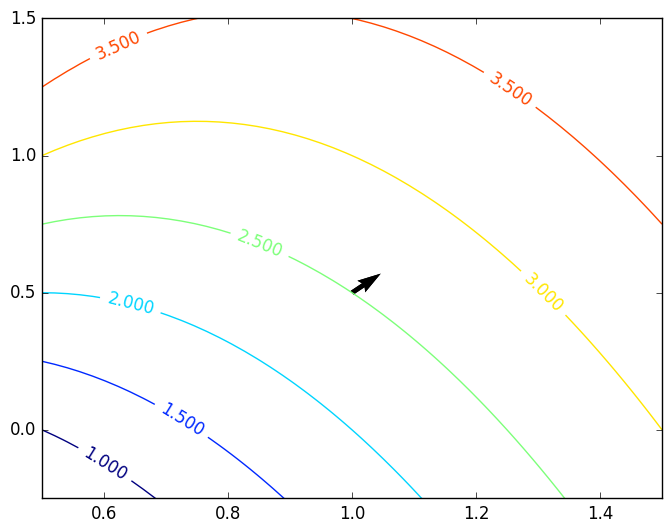

PyObject <matplotlib.quiver.Quiver object at 0x0000000024EF02B0>

In [12]:
contour(f, 1:0.5:4)
f1(x) = [2 - x[2]/x[1]^2, 1/x[1]]
x0 = [1, 0.5]
gradient = f1(x0)
a = arrow(x0, gradient);
#axis("equal"); # uncomment to show that gradient vector is normal to contour in direction of steepest increase

Linear: $f(\vec x) \approx f(\vec x^0) + \nabla f(\vec x^0)^\top (\vec x - \vec x^0)$

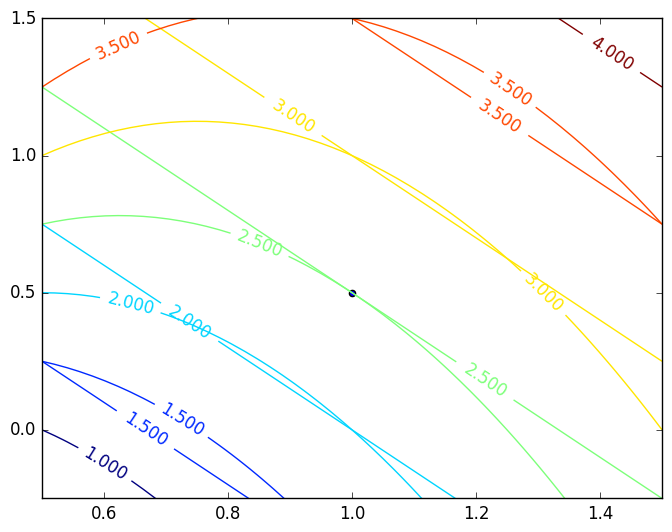

In [13]:
fLinear = x -> f(x0) + f1(x0)'*(x - x0)
scatter(x0)
contour(fLinear, 1:0.5:4)
contour(f, 1:0.5:4);

Quadratic: $f(\vec x) \approx f(\vec x^0) + \nabla f(\vec x^0)^\top (\vec x - \vec x^0) + \frac12(\vec x - \vec x^0)^\top[\nabla^2 f(\vec x^0)](\vec x - \vec x^0)$
$$\nabla f = \left[ \frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2} \right] = \left[ 2 - x_2/x_1^2, 1/x_1 \right]$$
$$\nabla^2 f = \left[\begin{matrix}
\frac{\partial^2 f}{\partial x_1 \partial x_1}& \frac{\partial^2 f}{\partial x_1 \partial x_2} \\
\frac{\partial^2 f}{\partial x_1 \partial x_2}& \frac{\partial^2 f}{\partial x_2 \partial x_2}
\end{matrix}
\right] = \left[
\begin{matrix}
2x_2/x^3& -1/x^2 \\
-1/x^2 & 0 
\end{matrix}
\right]$$

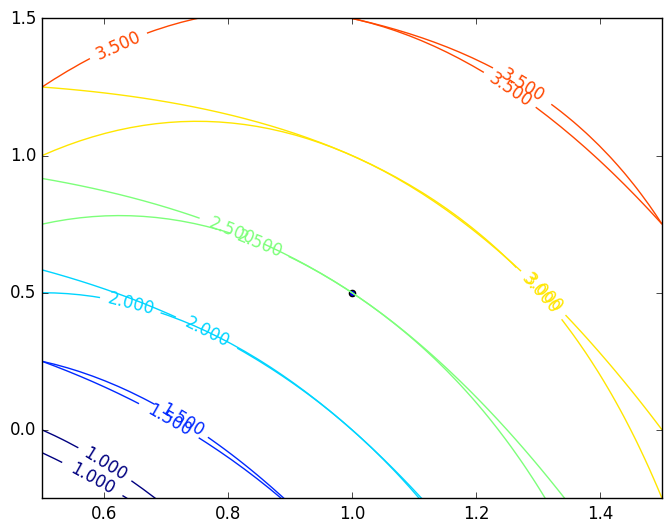

In [14]:
f2(x) = [2 * x[2] / x[1]^3 -1/x[1]^2; -1/x[1]^2 0];
fQuadratic(x) = f(x0) + f1(x0)'*(x - x0) + (1/2)*(x - x0)'*f2(x0)*(x - x0)
scatter(x0)
contour(fQuadratic, 1:0.5:4);
contour(f, 1:0.5:4);

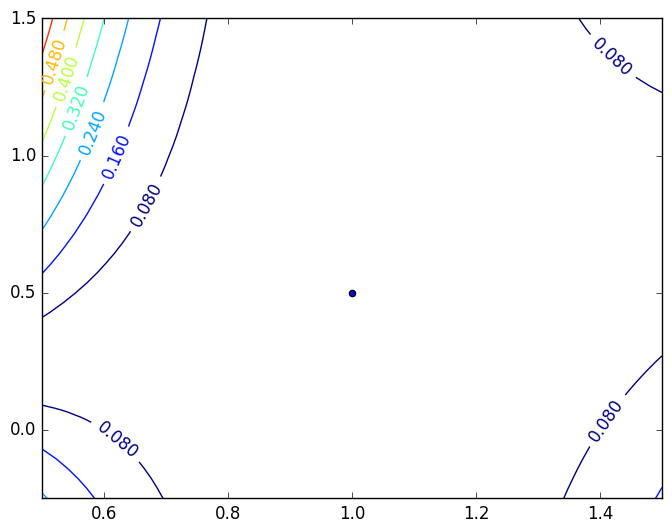

In [15]:
contour(x -> abs(f(x) - fQuadratic(x)), 0.08:0.08:0.64)
scatter(x0);

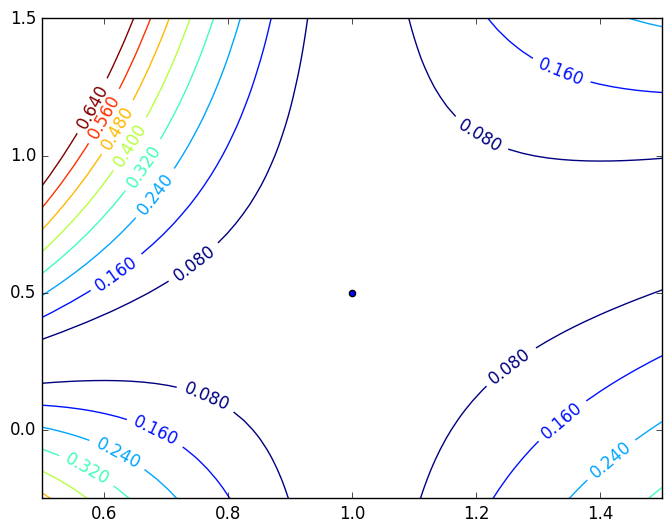

In [16]:
contour(x -> abs(f(x) - fLinear(x)),0.08:0.08:0.64)
scatter(x0);

# Derivatives

In [17]:
function derivative(f, eps)
    return x -> (f(x + eps) - f(x)) / eps
end

derivative (generic function with 1 method)

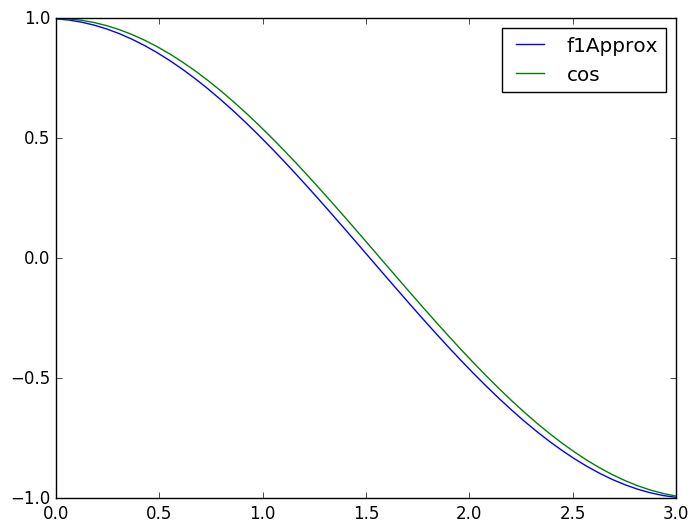

In [18]:
f(x) = sin(x)
f1Approx = derivative(f, 0.1)
xdom(0,3)
plot(f1Approx)
plot(cos)
legend(("f1Approx", "cos"));

In [19]:
function derivativeCentral(f, eps)
    return x -> (f(x + eps/2) - f(x - eps/2)) / eps
end

derivativeCentral (generic function with 1 method)

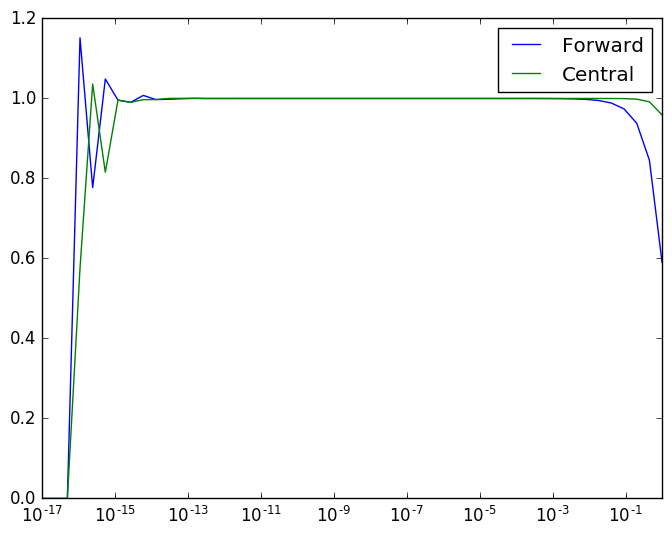

In [20]:
x = 0.5
xdom(1e-17,1)
semilogx(eps -> derivative(sin, eps)(x) / cos(x))
semilogx(eps -> derivativeCentral(sin, eps)(x) / cos(x))
legend(("Forward", "Central"));